In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


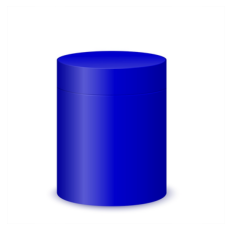

In [2]:
# Reading Image
img = cv2.imread("cylinder.png")

plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

In [3]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

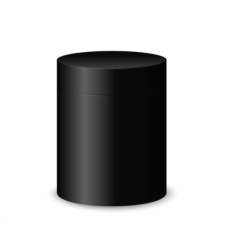

In [4]:
plt.imshow(img_gray, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

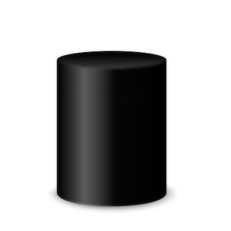

In [5]:
noise_removal = cv2.bilateralFilter(img_gray,9,75,75)

plt.imshow(noise_removal, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

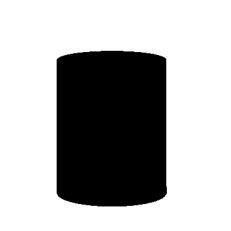

In [6]:
ret,thresh_image = cv2.threshold(img_gray,0,255,cv2.THRESH_OTSU)

plt.imshow(thresh_image, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

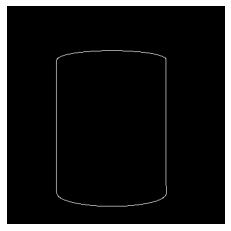

In [7]:
canny_image = cv2.Canny(thresh_image,250,255)

plt.imshow(canny_image, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

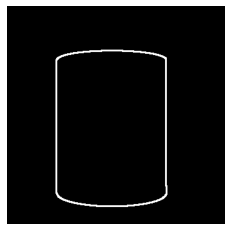

In [8]:
canny_image = cv2.convertScaleAbs(canny_image)
kernel = np.ones((3,3), np.uint8)
dilated_image = cv2.dilate(canny_image,kernel,iterations=1)

plt.imshow(dilated_image, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

In [9]:
contours, h = cv2.findContours(dilated_image, 1, 2)
contours= sorted(contours, key = cv2.contourArea, reverse = True)[:1]
pt = (180, 3 * img.shape[0] // 4)

for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    # print len(cnt)
    print(len(approx))
    if len(approx) <= 8 :
        print("Cube")
    else:
        print("Cylinder")


6
Cube


In [10]:
# Read the image
img = cv2.imread("cylinder.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection
edges = cv2.Canny(blur, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [11]:
# Iterate through contours and detect shapes
for contour in contours:
    # Approximate the contour to simplify it
    approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)
    
    # Check the number of vertices to determine the shape
    if len(approx) <= 7:
        shape_name = "Cube"
    else:
        shape_name = "Cylinder"  # Consider any contour with more than 6 vertices as a circle
    
    print(shape_name)
    
    # Draw the detected shape and label it
    cv2.drawContours(img, [approx], 0, (0, 255, 0), 2)
    cv2.putText(img, shape_name, (approx.ravel()[0], approx.ravel()[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

Cube


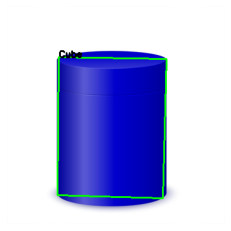

In [12]:
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()